In [1]:
import os 
import pandas as pd
import glob 
import seaborn as sns 
import matplotlib.pyplot as plt 

os.chdir('/mnt/BioHome/jreyna/jreyna/projects/dchallenge/')

## Loading the gencode reference

In [2]:
gencode = pd.read_table('results/refs/gencode/v30/gencode.v30.annotation.bed', header=None)
gencode = gencode.iloc[:, [4,6]]
gencode.set_index(6, inplace=True)
gencode = gencode.squeeze()
gencode = gencode.to_dict()

## Loading the coloc data 

In [122]:
data = []
coloc_glob = 'results/main/coloc/Results/Colocalization_SMKN/*/*/*/FINAL_Summary_Coloc_Gene_SNP_Pairs.bed'
coloc_fns = sorted(glob.glob(coloc_glob))

In [34]:
for fn in coloc_fns:
    
    df = pd.read_table(fn)
    
    fname_segs = fn.split('/')
    gwas = fname_segs[5]
    eqtl = fname_segs[6]
    ge = fname_segs[7]

    df['gwas'] = gwas
    df['eqtl'] = eqtl
    df['ge'] = ge
    
    data.append(df)

In [35]:
all_data = pd.concat(data)

# add the gene name
all_data['gene_name'] = all_data.geneName.replace(gencode)

## Check data sources

In [36]:
check_sources = all_data.drop_duplicates(['eqtl', 'ge'])
check_sources = check_sources[['eqtl', 'ge']]

In [37]:
pd.set_option('display.max_rows', 100) 
display(check_sources.set_index('eqtl'))
pd.set_option('display.max_rows', 20) 

,ge
eqtl,
BLUEPRINT,T-cell
BLUEPRINT,neutrophil
GENCORD,T-cell
GENCORD,fibroblast
GTEx,LCL
GTEx,adipose_subcutaneous
GTEx,adipose_visceral
GTEx,adrenal_gland
GTEx,artery_aorta


## Extract expression sources revelant to T1D

In [96]:
t1d_ge_sources = [
 'B-cell_naive',
 'CD4_T-cell_anti-CD3-CD28',
 'CD4_T-cell_naive',
 'CD8_T-cell_anti-CD3-CD28',
 'CD8_T-cell_naive',
 'LCL',
 'NK-cell_naive',
 'T-cell',
 'Tfh_memory',
 'Th1-17_memory',
 'Th17_memory',
 'Th1_memory',
 'Th2_memory',
 'Treg_memory',
 'Treg_naive',
 'blood',
 'fibroblast',
 'monocyte_CD16_naive',
 'monocyte_IAV',
 'monocyte_LPS',
 'monocyte_Pam3CSK4',
 'monocyte_R848',
 'monocyte_naive',
 'neutrophil',
 'pancreas',
 'pancreatic_islet',
 'thyroid']

In [131]:
for x in t1d_ge_sources:
    print(x)

B-cell_naive
CD4_T-cell_anti-CD3-CD28
CD4_T-cell_naive
CD8_T-cell_anti-CD3-CD28
CD8_T-cell_naive
LCL
NK-cell_naive
T-cell
Tfh_memory
Th1-17_memory
Th17_memory
Th1_memory
Th2_memory
Treg_memory
Treg_naive
blood
fibroblast
monocyte_CD16_naive
monocyte_IAV
monocyte_LPS
monocyte_Pam3CSK4
monocyte_R848
monocyte_naive
neutrophil
pancreas
pancreatic_islet
thyroid


In [138]:
for i, sr in check_sources.iterrows():
    print('\t'.join(sr.to_list()))

BLUEPRINT	T-cell
BLUEPRINT	neutrophil
GENCORD	T-cell
GENCORD	fibroblast
GTEx	LCL
GTEx	adipose_subcutaneous
GTEx	adipose_visceral
GTEx	adrenal_gland
GTEx	artery_aorta
GTEx	artery_coronary
GTEx	artery_tibial
GTEx	blood
GTEx	brain_amygdala
GTEx	brain_anterior_cingulate_cortex
GTEx	brain_caudate
GTEx	brain_cerebellar_hemisphere
GTEx	brain_cerebellum
GTEx	brain_cortex
GTEx	brain_frontal_cortex
GTEx	brain_hippocampus
GTEx	brain_hypothalamus
GTEx	brain_nucleus_accumbens
GTEx	brain_putamen
GTEx	brain_spinal_cord
GTEx	brain_substantia_nigra
GTEx	breast
GTEx	colon_sigmoid
GTEx	colon_transverse
GTEx	esophagus_gej
GTEx	esophagus_mucosa
GTEx	esophagus_muscularis
GTEx	fibroblast
GTEx	heart_atrial_appendage
GTEx	heart_left_ventricle
GTEx	kidney_cortex
GTEx	liver
GTEx	lung
GTEx	minor_salivary_gland
GTEx	muscle
GTEx	nerve_tibial
GTEx	ovary
GTEx	pancreas
GTEx	pituitary
GTEx	prostate
GTEx	skin_not_sun_exposed
GTEx	skin_sun_exposed
GTEx	small_intestine
GTEx	spleen
GTEx	stomach
GTEx	thyroid
GTEx	uterus
GTE

In [131]:
for x in t1d_ge_sources:
    print(x)

B-cell_naive
CD4_T-cell_anti-CD3-CD28
CD4_T-cell_naive
CD8_T-cell_anti-CD3-CD28
CD8_T-cell_naive
LCL
NK-cell_naive
T-cell
Tfh_memory
Th1-17_memory
Th17_memory
Th1_memory
Th2_memory
Treg_memory
Treg_naive
blood
fibroblast
monocyte_CD16_naive
monocyte_IAV
monocyte_LPS
monocyte_Pam3CSK4
monocyte_R848
monocyte_naive
neutrophil
pancreas
pancreatic_islet
thyroid


In [99]:
t1d_data = all_data.loc[all_data['ge'].isin(t1d_ge_sources)]

In [100]:
# filtering on the pp_H4_Coloc_Summary
t1d_data = t1d_data.loc[t1d_data.pp_H4_Coloc_Summary > 0.75]

In [101]:
t1d_data

,chr,pos,pp_H0_Coloc_Summary,pp_H1_Coloc_Summary,pp_H2_Coloc_Summary,pp_H3_Coloc_Summary,pp_H4_Coloc_Summary,rs_id,variant_id,geneName,...,AN,slope_se_snp,slope_gwas,slope_se_gwas,pval_nominal,SampleSize,gwas,eqtl,ge,gene_name
0,chr16,75247337,5.465817e-64,3.551930e-64,0.070681,0.045048,0.884271,rs11317724,rs11317724:75247337:GT:G,ENSG00000196436,...,5008,0.021805,0.170677,0.022578,4.040000e-14,520580,T1D_34012112_Gaulton,BLUEPRINT,T-cell,NPIPB15
1,chr16,75247337,5.465817e-64,3.551930e-64,0.070681,0.045048,0.884271,rs11317724,rs11317724:75247337:GT:G,ENSG00000166848,...,5008,5.915775,0.170677,0.022578,4.040000e-14,520580,T1D_34012112_Gaulton,BLUEPRINT,T-cell,TERF2IP
2,chr16,75247337,5.465817e-64,3.551930e-64,0.070681,0.045048,0.884271,rs11317724,rs11317724:75247337:GT:G,ENSG00000168404,...,5008,31.589022,0.170677,0.022578,4.040000e-14,520580,T1D_34012112_Gaulton,BLUEPRINT,T-cell,MLKL
3,chr16,75247337,5.465817e-64,3.551930e-64,0.070681,0.045048,0.884271,rs11317724,rs11317724:75247337:GT:G,ENSG00000168411,...,5008,3.780248,0.170677,0.022578,4.040000e-14,520580,T1D_34012112_Gaulton,BLUEPRINT,T-cell,RFWD3
4,chr16,75247337,5.465817e-64,3.551930e-64,0.070681,0.045048,0.884271,rs11317724,rs11317724:75247337:GT:G,ENSG00000184517,...,5008,0.852248,0.170677,0.022578,4.040000e-14,520580,T1D_34012112_Gaulton,BLUEPRINT,T-cell,ZFP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,chr18,12780464,2.056719e-115,7.667458e-112,0.000062,0.230648,0.769290,rs9952991,rs9952991:12780464:G:A,ENSG00000267136,...,5008,49.144690,-0.221123,0.019357,3.200000e-30,405537,T1D_34012112_Gaulton,van_de_Bunt_2015,pancreatic_islet,AP005131.1
88,chr18,12780464,2.056719e-115,7.667458e-112,0.000062,0.230648,0.769290,rs9952991,rs9952991:12780464:G:A,ENSG00000267069,...,5008,1.313803,-0.221123,0.019357,3.200000e-30,405537,T1D_34012112_Gaulton,van_de_Bunt_2015,pancreatic_islet,AP005264.1
89,chr18,12780464,2.056719e-115,7.667458e-112,0.000062,0.230648,0.769290,rs9952991,rs9952991:12780464:G:A,ENSG00000267079,...,5008,5.302710,-0.221123,0.019357,3.200000e-30,405537,T1D_34012112_Gaulton,van_de_Bunt_2015,pancreatic_islet,AP001269.2
90,chr18,12780464,2.056719e-115,7.667458e-112,0.000062,0.230648,0.769290,rs9952991,rs9952991:12780464:G:A,ENSG00000267108,...,5008,0.789705,-0.221123,0.019357,3.200000e-30,405537,T1D_34012112_Gaulton,van_de_Bunt_2015,pancreatic_islet,AP001029.1


In [102]:
all_data.shape

(5436, 28)

In [103]:
t1d_data.shape

(1414, 28)

## Plotting study summary

In [104]:
study_summary = t1d_data.value_counts(['gwas', 'eqtl', 'ge']).to_frame().reset_index()
study_summary.rename(columns={0:'count'}, inplace=True)

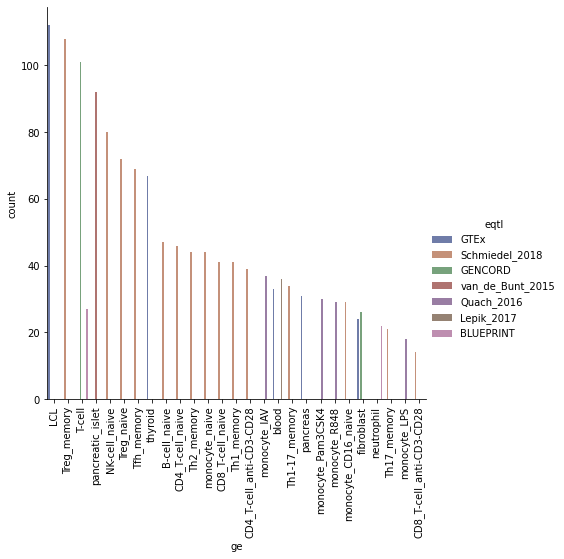

In [105]:
#sns.barplot(hue='eqtl', y='count', x='ge', data=study_summary)

# fig, ax = plt.subplots()
# Draw a nested barplot by species and sex
g= sns.catplot(data=study_summary, kind="bar",
            x="ge", y="count", hue="eqtl",
            ci="sd", palette="dark", alpha=.6, height=6)

for x in g.ax.get_xticklabels():
    x.set_rotation(90)

## Gene Summary

In [106]:
gene_summary = t1d_data.groupby(['gwas', 'eqtl', 'ge']).gene_name.value_counts()

In [107]:
pd.set_option('display.max_rows', gene_summary.shape[0]) 
display(gene_summary.to_frame())
pd.set_option('display.max_rows', 20) 

gene_name
gwas                 eqtl             ge                       gene_name              
T1D_34012112_Gaulton BLUEPRINT        T-cell                   AC009053.2            1
                                                               AC009054.1            1
                                                               AC009054.2            1
                                                               AC009120.2            1
                                                               AC009120.3            1
                                                               AC009120.5            1
                                                               AC009163.3            1
                                                               AC009163.5            1
                                                               AC009163.6            1
                                                               AC025287.1            1
                                                               AC025287.3            1
                                                               ADAT1                 1
                                                               CFDP1                 1
                                                               CLEC18B               1
                                                               GABARAPL2             1
                                                               GLG1                  1
                                                               KARS                  1
                                                               MLKL                  1
                                                               NPIPB15               1
                                                               PSMD7                 1
                                                               RFWD3                 1
                                                               TERF2IP               1
                                                               TMEM170A              1
                                                               TMEM231               1
                                                               WDR59                 1
                                                               ZFP1                  1
                                                               ZNRF1                 1
                                      neutrophil               AC004540.1            1
                                                               AC005091.1            1
                                                               AK3                   1
                                                               AL354977.2            1
                                                               AL359095.1            1
                                                               CBX3                  1
                                                               CDC37L1               1
                                                               CDC37L1-DT            1
                                                               GLIS3                 1
                                                               HIBADH                1
                                                               HNRNPA2B1             1
                                                               HOTAIRM1              1
                                                               HOXA-AS2              1
                                                               HOXA1                 1
                                                               HOXA5                 1
                                                               JAK2                  1
                                                               PLPP6                 1
                                                               RCL1        

In [114]:
t1d_data.shape

(1414, 28)

In [115]:
t1d_data.drop_duplicates(['eqtl', 'ge', 'gene_name']).shape

(1414, 28)

In [118]:
t1d_data.gene_name.value_counts().to_frame()

,gene_name
HNRNPA2B1,20
CBX3,20
SKAP2,20
HOTAIRM1,20
TAX1BP1,20
...,...
HIST1H2AI,1
AC004080.3,1
AP005264.4,1
HOXA-AS3,1


In [121]:
t1d_data.gene_name.nunique()

257

In [108]:
gene_uniq_summary = t1d_data.drop_duplicates(['eqtl', 'ge', 'gene_name']).gene_name.value_counts()
gene_uniq_summary = gene_uniq_summary.to_frame()
gene_uniq_summary.sort_values('gene_name', ascending=False, inplace=True)

In [109]:
gene_uniq_summary.columns = ['Number of Unique Colocalizations in ALL Studies']

In [110]:
pd.set_option('display.max_rows', gene_uniq_summary.shape[0]) 
display(gene_uniq_summary)
pd.set_option('display.max_rows', 20) 

,Number of Unique Colocalizations in ALL Studies
HNRNPA2B1,20
TAX1BP1,20
HIBADH,20
CBX3,20
HOTAIRM1,20
SKAP2,20
NFE2L3,19
SNX10,19
KLHL2,18
HOXA1,18


In [111]:
with open('enrichr.input.txt', 'w') as fw:
    for x in sorted(gene_uniq_summary.index.tolist()):
        print(x, file=fw)
        print(x)

AC003070.1
AC003070.2
AC004080.2
AC004080.3
AC004217.1
AC004540.1
AC004540.2
AC004551.1
AC005091.1
AC005670.1
AC008105.1
AC008105.3
AC009053.2
AC009053.3
AC009054.1
AC009054.2
AC009120.2
AC009120.3
AC009120.4
AC009120.5
AC009163.1
AC009163.3
AC009163.5
AC009163.6
AC010719.1
AC025287.1
AC025287.2
AC025287.3
AC025287.4
AC068152.1
AC073575.1
AC073575.2
AC089999.2
AC091132.1
AC091132.2
AC091132.4
AC091132.5
AC099508.1
AC099508.2
AC126544.2
AC138150.1
AC138150.2
ADAT1
AFG3L2
AK3
AL009179.1
AL021918.3
AL021918.4
AL021997.3
AL031118.1
AL031770.1
AL121944.1
AL137071.1
AL354977.1
AL354977.2
AL357054.2
AL357054.4
AL358933.1
AL359095.1
AL662791.1
ALDH2
ANKRD62
AP001010.1
AP001029.1
AP001029.2
AP001269.1
AP001269.2
AP001269.4
AP001542.3
AP002414.5
AP002439.1
AP002449.1
AP002505.1
AP005131.1
AP005131.2
AP005131.3
AP005131.4
AP005131.5
AP005131.6
AP005131.7
AP005137.1
AP005137.2
AP005264.1
AP005264.3
AP005264.4
AP005482.1
AP005482.2
AP005482.3
APELA
ARHGAP27
ARL17A
ARL17B
BCAR1
C7orf71
CBX3
CDC37L1


In [112]:
gene_uniq_summary.shape

(257, 1)